# Notes for YouTube Python Tutorials
## Python Pandas Tutorial
https://m.youtube.com/watch?v=ZyhVh-qRZPA&list=PL-osiE80TeTsWmV9i9c58mdDCSsklFdDS&index=2&t=247s

## Python Pandas Tutorial (Part 6): Add/Remove Rows and Columns From DataFrames

Sample data was downloaded from the following link.<br>
https://insights.stackoverflow.com/survey

In [1]:
import pandas as pd


# Small sample Example
people = {
    "first": ["Corey", "Jane", "John"],
    "last": ["Schafer", "Doe", "Doe"],
    "email": ["CoreyMSchafer@gmail.com", "JaneDoe@email.com", "JohnDoe@email.com"]
}

people_df = pd.DataFrame(people, columns=['first', 'last', 'email'])
people_df

,first,last,email
0,Corey,Schafer,CoreyMSchafer@gmail.com
1,Jane,Doe,JaneDoe@email.com
2,John,Doe,JohnDoe@email.com


In [2]:
# Real world example
df = pd.read_csv('Python Data/developer_survey_2019/survey_results_public.csv',
                     index_col='Respondent')
schema_df = pd.read_csv('Python Data/developer_survey_2019/survey_results_schema.csv',
                     index_col='Column')

### Small Sample Example

In [3]:
# Add a new column
people_df['full_name'] = people_df['first'] + ' ' + people_df['last']
people_df

,first,last,email,full_name
0,Corey,Schafer,CoreyMSchafer@gmail.com,Corey Schafer
1,Jane,Doe,JaneDoe@email.com,Jane Doe
2,John,Doe,JohnDoe@email.com,John Doe


In [4]:
# Remove columns
people_df.drop(columns=['first', 'last'], inplace=True)
people_df

,email,full_name
0,CoreyMSchafer@gmail.com,Corey Schafer
1,JaneDoe@email.com,Jane Doe
2,JohnDoe@email.com,John Doe


In [5]:
# Separate a column to two
people_df['full_name'].str.split(' ')

0    [Corey, Schafer]
1         [Jane, Doe]
2         [John, Doe]
Name: full_name, dtype: object

In [6]:
# expand will change data to dataframe
people_df[['first', 'last']] = people_df['full_name'].str.split(' ', expand=True)
people_df

,email,full_name,first,last
0,CoreyMSchafer@gmail.com,Corey Schafer,Corey,Schafer
1,JaneDoe@email.com,Jane Doe,Jane,Doe
2,JohnDoe@email.com,John Doe,John,Doe


In [7]:
# Add a single row of data
# ignore_index will filled all empty with NaN. Otherwise, an error will be popped out.
people_df.append({'first': 'Tony'}, ignore_index=True)

,email,full_name,first,last
0,CoreyMSchafer@gmail.com,Corey Schafer,Corey,Schafer
1,JaneDoe@email.com,Jane Doe,Jane,Doe
2,JohnDoe@email.com,John Doe,John,Doe
3,NaN,NaN,Tony,NaN


In [8]:
people2 = {
    'first': ['Tony', 'Steve'],
    'last': ['Stark', 'Rogers'],
    'email': ['IronMan@avenge.com', 'Cap@avenge.com']
}

# Note: The column order of people_df2 is not the same as people_df's.
people_df2 = pd.DataFrame(people2)
people_df2

,first,last,email
0,Tony,Stark,IronMan@avenge.com
1,Steve,Rogers,Cap@avenge.com


In [9]:
# Because people_df and people_df2 has differnt column orders,
# an warning of "sort=False" may pop out.
# Adding "sort=False" will remove the warning.
people_df = people_df.append(people_df2, ignore_index=True, sort=False)
people_df

,email,full_name,first,last
0,CoreyMSchafer@gmail.com,Corey Schafer,Corey,Schafer
1,JaneDoe@email.com,Jane Doe,Jane,Doe
2,JohnDoe@email.com,John Doe,John,Doe
3,IronMan@avenge.com,NaN,Tony,Stark
4,Cap@avenge.com,NaN,Steve,Rogers


In [10]:
# Remove a single row
people_df.drop(index=4)

,email,full_name,first,last
0,CoreyMSchafer@gmail.com,Corey Schafer,Corey,Schafer
1,JaneDoe@email.com,Jane Doe,Jane,Doe
2,JohnDoe@email.com,John Doe,John,Doe
3,IronMan@avenge.com,NaN,Tony,Stark


In [11]:
# Remove rows by condidtion
filt = people_df['last'] == 'Doe'
people_df.drop(index=people_df[filt].index)

,email,full_name,first,last
0,CoreyMSchafer@gmail.com,Corey Schafer,Corey,Schafer
3,IronMan@avenge.com,NaN,Tony,Stark
4,Cap@avenge.com,NaN,Steve,Rogers


In [12]:
filt = pd.isna(people_df['full_name'])
people_df = people_df.drop(people_df[filt].index)
people_df

,email,full_name,first,last
0,CoreyMSchafer@gmail.com,Corey Schafer,Corey,Schafer
1,JaneDoe@email.com,Jane Doe,Jane,Doe
2,JohnDoe@email.com,John Doe,John,Doe


## Python Pandas Tutorial (Part 7): Sorting Data

### Small Sample Example

In [13]:
# Modify sample data for further learning.
people_df.drop(columns='full_name', inplace=True)
people_df = people_df.append({'first': 'Adam', 'last': 'Doe', 'email': 'A@email.com'}, ignore_index=True)
people_df

,email,first,last
0,CoreyMSchafer@gmail.com,Corey,Schafer
1,JaneDoe@email.com,Jane,Doe
2,JohnDoe@email.com,John,Doe
3,A@email.com,Adam,Doe


In [14]:
people_df.sort_values(by='last', ascending=False)

,email,first,last
0,CoreyMSchafer@gmail.com,Corey,Schafer
1,JaneDoe@email.com,Jane,Doe
2,JohnDoe@email.com,John,Doe
3,A@email.com,Adam,Doe


In [15]:
# Both last and first in descending order.
people_df.sort_values(by=['last', 'first'], ascending=False)

,email,first,last
0,CoreyMSchafer@gmail.com,Corey,Schafer
2,JohnDoe@email.com,John,Doe
1,JaneDoe@email.com,Jane,Doe
3,A@email.com,Adam,Doe


In [16]:
# Last name in descending order and first be in ascending order.
people_df.sort_values(by=['last', 'first'], ascending=[False, True], inplace=True)
people_df

,email,first,last
0,CoreyMSchafer@gmail.com,Corey,Schafer
3,A@email.com,Adam,Doe
1,JaneDoe@email.com,Jane,Doe
2,JohnDoe@email.com,John,Doe


In [17]:
# Back to original
people_df.sort_index()

,email,first,last
0,CoreyMSchafer@gmail.com,Corey,Schafer
1,JaneDoe@email.com,Jane,Doe
2,JohnDoe@email.com,John,Doe
3,A@email.com,Adam,Doe


In [18]:
# Only sort a series.
people_df['last'].sort_values()

3        Doe
1        Doe
2        Doe
0    Schafer
Name: last, dtype: object

### Real World Example

In [19]:
df.sort_values(by='Country', inplace=True)
df['Country'].head(10)

Respondent
39258    Afghanistan
63129    Afghanistan
85715    Afghanistan
50767    Afghanistan
2782     Afghanistan
63019    Afghanistan
6417     Afghanistan
40000    Afghanistan
88731    Afghanistan
48436    Afghanistan
Name: Country, dtype: object

In [20]:
df[['Country', 'ConvertedComp']].head(10)

,Country,ConvertedComp
Respondent,,
39258,Afghanistan,19152.0
63129,Afghanistan,1000000.0
85715,Afghanistan,NaN
50767,Afghanistan,NaN
2782,Afghanistan,NaN
63019,Afghanistan,NaN
6417,Afghanistan,NaN
40000,Afghanistan,NaN
88731,Afghanistan,NaN


In [21]:
df.sort_values(by=['Country', 'ConvertedComp'], ascending=[True, False], inplace=True)
df[['Country', 'ConvertedComp']].head(10)

,Country,ConvertedComp
Respondent,,
63129,Afghanistan,1000000.0
50499,Afghanistan,153216.0
39258,Afghanistan,19152.0
58450,Afghanistan,17556.0
7085,Afghanistan,14364.0
22450,Afghanistan,7980.0
48436,Afghanistan,4464.0
10746,Afghanistan,3996.0
8149,Afghanistan,1596.0


In [22]:
# Getting the largestest values
df['ConvertedComp'].nlargest(10)

Respondent
25983    2000000.0
87896    2000000.0
22013    2000000.0
28243    2000000.0
72732    2000000.0
78151    2000000.0
80200    2000000.0
52132    2000000.0
75561    2000000.0
32250    2000000.0
Name: ConvertedComp, dtype: float64

In [23]:
# Not only ConvertedComp from dataframe
df.nlargest(10, 'ConvertedComp')
# df.nsmallest(10, 'ConvertedComp')

,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
Respondent,,,,,,,,,,,,,,,,,,,,,
25983,I am a developer by profession,Yes,Less than once per year,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Canada,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Received on-the-job training in software devel...,...,Just as welcome now as I felt last year,NaN,24.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
87896,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,Germany,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,...,Just as welcome now as I felt last year,Tech articles written by other developers;Tech...,32.0,Man,No,Gay or Lesbian,White or of European descent,No,Appropriate in length,Neither easy nor difficult
22013,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,India,No,"Professional degree (JD, MD, etc.)","A natural science (ex. biology, chemistry, phy...",Taken an online course in programming or softw...,...,A lot more welcome now than last year,Tech articles written by other developers;Indu...,NaN,Man,No,Straight / Heterosexual,NaN,Yes,Too long,Easy
28243,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...","Independent contractor, freelancer, or self-em...",India,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,...,A lot less welcome now than last year,Tech meetups or events in your area,NaN,NaN,NaN,Straight / Heterosexual,NaN,Yes,Too short,Easy
72732,"I am not primarily a developer, but I write co...",No,Less than once a month but more than once per ...,"OSS is, on average, of LOWER quality than prop...",NaN,India,"Yes, full-time","Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Contributed to open source software,...,A lot less welcome now than last year,Tech articles written by other developers;Tech...,NaN,Man,No,NaN,NaN,Yes,Too long,Easy
78151,I am a developer by profession,Yes,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Mexico,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,32.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina,No,Appropriate in length,Easy
80200,I am a developer by profession,Yes,Never,"OSS is, on average, of LOWER quality than prop...",Employed full-time,Netherlands,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Received on-the-job training in software devel...,...,NaN,Tech articles written by other developers,25.0,Woman,No,Bisexual,White or of European descent,No,Appropriate in length,Easy
52132,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Peru,No,Some college/university study without earning ...,I never declared a major,Completed an industry certification program (e...,...,Just as welcome now as I felt last year,Tech articles written by other developers;Tech...,48.0,Man,NaN,NaN,Black or of African descent;East Asian;Hispani...,Yes,Appropriate in length,Easy
75561,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed f

In [24]:
# Remove sort_values for further tutorials
df.sort_index(inplace=True)

## Python Pandas Tutorial (Part 8): Grouping and Aggregating - Analyzing and Exploring Your Data

In [25]:
# Get the median value of ConvertedComp, which ignored NaN
df['ConvertedComp'].median()

57287.0

In [26]:
# median for all numerical values
df.median()

CompTotal        62000.0
ConvertedComp    57287.0
WorkWeekHrs         40.0
CodeRevHrs           4.0
Age                 29.0
dtype: float64

In [27]:
# count => the number of non na rows
df.describe()

,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,5.594500e+04,5.582300e+04,64503.000000,49790.000000,79210.000000
mean,5.519014e+11,1.271107e+05,42.127197,5.084308,30.336699
std,7.331926e+13,2.841523e+05,37.287610,5.513931,9.178390
min,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000
25%,2.000000e+04,2.577750e+04,40.000000,2.000000,24.000000
50%,6.200000e+04,5.728700e+04,40.000000,4.000000,29.000000
75%,1.200000e+05,1.000000e+05,44.750000,6.000000,35.000000
max,1.000000e+16,2.000000e+06,4850.000000,99.000000,99.000000


In [28]:
df['Hobbyist'].count()

88883

In [29]:
# Count by values
df['Hobbyist'].value_counts()

Yes    71257
No     17626
Name: Hobbyist, dtype: int64

In [30]:
# Change the number to percentage
df['SocialMedia'].value_counts(normalize=True)

Reddit                      0.170233
YouTube                     0.163791
WhatsApp                    0.158071
Facebook                    0.156069
Twitter                     0.134988
Instagram                   0.074150
I don't use social media    0.065777
LinkedIn                    0.053306
WeChat 微信                   0.007899
Snapchat                    0.007437
VK ВКонта́кте               0.007141
Weibo 新浪微博                  0.000663
Youku Tudou 优酷              0.000249
Hello                       0.000225
Name: SocialMedia, dtype: float64

In [31]:
# The same as groupby for a single country
filt = (df['Country'] == 'United States')
df.loc[filt].head(5)

,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
Respondent,,,,,,,,,,,,,,,,,,,,,
4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
22,I am a developer by profession,Yes,Less than once per year,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,Some college/university study without earning ...,NaN,Taken an online course in programming or softw...,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,47.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
23,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Information systems, information technology, o...",Taken an online course in programming or softw...,...,Just as welcome now as I felt last year,Tech articles written by other developers;Tech...,22.0,Man,No,Straight / Heterosexual,Black or of African descent,No,Appropriate in length,Easy
26,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,United States,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","Taught yourself a new language, framework, or ...",...,Just as welcome now as I felt last year,NaN,34.0,Man,No,Gay or Lesbian,NaN,No,Appropriate in length,Easy


In [32]:
# Goup ==> split, apply function, combine results
# Group by Country
country_grp = df.groupby(['Country'])

# It is similar with filter.
# groupby => group all countries
# filter  => only one country
country_grp.get_group('United States').head(5)

,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
Respondent,,,,,,,,,,,,,,,,,,,,,
4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
22,I am a developer by profession,Yes,Less than once per year,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,Some college/university study without earning ...,NaN,Taken an online course in programming or softw...,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,47.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
23,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Information systems, information technology, o...",Taken an online course in programming or softw...,...,Just as welcome now as I felt last year,Tech articles written by other developers;Tech...,22.0,Man,No,Straight / Heterosexual,Black or of African descent,No,Appropriate in length,Easy
26,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,United States,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","Taught yourself a new language, framework, or ...",...,Just as welcome now as I felt last year,NaN,34.0,Man,No,Gay or Lesbian,NaN,No,Appropriate in length,Easy


In [33]:
# value_counts to filter method
df.loc[filt]['SocialMedia'].value_counts()

Reddit                      5700
Twitter                     3468
Facebook                    2844
YouTube                     2463
I don't use social media    1851
Instagram                   1652
LinkedIn                    1020
WhatsApp                     609
Snapchat                     326
WeChat 微信                     93
VK ВКонта́кте                  9
Weibo 新浪微博                     8
Hello                          2
Youku Tudou 优酷                 1
Name: SocialMedia, dtype: int64

In [34]:
# value_counts for groupby method
country_grp['SocialMedia'].value_counts().head(20)

Country      SocialMedia             
Afghanistan  Facebook                    15
             YouTube                      9
             I don't use social media     6
             WhatsApp                     4
             Instagram                    1
             LinkedIn                     1
             Twitter                      1
Albania      WhatsApp                    18
             Facebook                    16
             Instagram                   13
             YouTube                     10
             Twitter                      8
             LinkedIn                     7
             Reddit                       6
             I don't use social media     4
             Snapchat                     1
             WeChat 微信                    1
Algeria      YouTube                     42
             Facebook                    41
             Twitter                     14
Name: SocialMedia, dtype: int64

In [35]:
# Only get one country
country_grp['SocialMedia'].value_counts().loc['India']

SocialMedia
WhatsApp                    2990
YouTube                     1820
LinkedIn                     955
Facebook                     841
Instagram                    822
Twitter                      542
Reddit                       473
I don't use social media     250
Snapchat                      23
Hello                          5
WeChat 微信                      5
VK ВКонта́кте                  4
Youku Tudou 优酷                 2
Weibo 新浪微博                     1
Name: SocialMedia, dtype: int64

In [36]:
country_grp['SocialMedia'].value_counts(normalize=True).loc['China']

SocialMedia
WeChat 微信                   0.670549
YouTube                     0.088186
Weibo 新浪微博                  0.069884
I don't use social media    0.044925
Twitter                     0.044925
Reddit                      0.019967
LinkedIn                    0.018303
Facebook                    0.013311
Instagram                   0.011647
Youku Tudou 优酷              0.011647
WhatsApp                    0.004992
VK ВКонта́кте               0.001664
Name: SocialMedia, dtype: float64

In [37]:
country_grp['ConvertedComp'].median().head(5)

Country
Afghanistan      6222.0
Albania         10818.0
Algeria          7878.0
Andorra        160931.0
Angola           7764.0
Name: ConvertedComp, dtype: float64

In [38]:
country_grp['ConvertedComp'].median().loc['Germany']

63016.0

In [39]:
# Run multiple aggregate functions on group
country_grp['ConvertedComp'].agg(['median', 'mean']).head(5)

,median,mean
Country,,
Afghanistan,6222.0,101953.333333
Albania,10818.0,21833.700000
Algeria,7878.0,34924.047619
Andorra,160931.0,160931.000000
Angola,7764.0,7764.000000


In [40]:
country_grp['ConvertedComp'].agg(['median', 'mean']).loc['Canada']

median     68705.000000
mean      134018.564909
Name: Canada, dtype: float64

In [41]:
# How many people in each country know how to use Python
# filter method
filt = (df['Country'] == 'India')
df.loc[filt, 'LanguageWorkedWith'].str.contains('Python', na=False).value_counts()

False    5956
True     3105
Name: LanguageWorkedWith, dtype: int64

In [42]:
# Tutorial method
df.loc[filt]['LanguageWorkedWith'].str.contains('Python').sum()

3105

In [43]:
# AttributeError: Cannot access attribute 'str' of 'SeriesGroupBy' objects, try using the 'apply' method
# So, the following line doesn't work
# country_grp['LanguageWorkedWith'].str.contains('Python')
country_grp['LanguageWorkedWith'].apply(lambda x: x.str.contains('Python').sum()).head(5)

Country
Afghanistan     8
Albania        23
Algeria        40
Andorra         0
Angola          2
Name: LanguageWorkedWith, dtype: int64

### What % of people from eah country know Python?

In [44]:
country_respondents = df['Country'].value_counts()
country_uses_python = country_grp['LanguageWorkedWith'].apply(lambda x: x.str.contains('Python').sum())

# Combine two series
python_df = pd.concat([country_respondents, country_uses_python], axis='columns', sort=False) # concatenate
python_df.rename(columns={'Country': 'NumRespondents', 'LanguageWorkedWith': 'NumKnowsPython'}, inplace=True)

python_df.head(5)

,NumRespondents,NumKnowsPython
United States,20949,10083
India,9061,3105
Germany,5866,2451
United Kingdom,5737,2384
Canada,3395,1558


In [45]:
python_df['PctKnowsPython'] = (python_df['NumKnowsPython'] / python_df['NumRespondents']) * 100
python_df.sort_values(by='PctKnowsPython', ascending=False, inplace=True)
python_df.head(15)

,NumRespondents,NumKnowsPython,PctKnowsPython
Niger,1,1,100.000000
Dominica,1,1,100.000000
Timor-Leste,1,1,100.000000
Sao Tome and Principe,1,1,100.000000
Turkmenistan,7,6,85.714286
Mauritania,7,5,71.428571
Guyana,3,2,66.666667
Bahamas,3,2,66.666667
Guinea,3,2,66.666667
Uganda,72,47,65.277778


## Python Pandas Tutorial (Part 9): Cleaning Data - Casting Datatypes and Handling Missing Values

### Small Sample Example

In [46]:
import pandas as pd
import numpy as np


people = {
    'first': ['Corey', 'Jane', 'John', 'Chris', np.nan, None, 'NA'],
    'last': ['Schafer', 'Doe', 'Doe', 'Schafer', np.nan, np.nan, 'Missing'],
    'email': ['CoreyMSchafer@gmail.com', 'JaneDoe@email.com', 'JohnDoe@email.com',
              None, np.nan, 'Anonymous@email.com', 'NA'],
    'age': ['33', '55', '63', '36', None, None, 'Missing']
}
people_df = pd.DataFrame(people, columns=['first', 'last', 'email', 'age'])
people_df

,first,last,email,age
0,Corey,Schafer,CoreyMSchafer@gmail.com,33
1,Jane,Doe,JaneDoe@email.com,55
2,John,Doe,JohnDoe@email.com,63
3,Chris,Schafer,None,36
4,NaN,NaN,NaN,None
5,None,NaN,Anonymous@email.com,None
6,NA,Missing,NA,Missing


In [47]:
# The last one is custom missing values.
people_df.dropna()

# It is the same as
# people_df.dropna(axis='index', how='any') # They are default values
# axis='index' # drop values in rows
# how='any' # it is the criteria for dropping a row

,first,last,email,age
0,Corey,Schafer,CoreyMSchafer@gmail.com,33
1,Jane,Doe,JaneDoe@email.com,55
2,John,Doe,JohnDoe@email.com,63
6,NA,Missing,NA,Missing


In [48]:
# index 4 has all missing values.
people_df.dropna(axis='index', how='all')

,first,last,email,age
0,Corey,Schafer,CoreyMSchafer@gmail.com,33
1,Jane,Doe,JaneDoe@email.com,55
2,John,Doe,JohnDoe@email.com,63
3,Chris,Schafer,None,36
5,None,NaN,Anonymous@email.com,None
6,NA,Missing,NA,Missing


In [49]:
# Since we have index 4, which all columns has empty values.
# All columns will be dropped.
people_df.dropna(axis='columns', how='any')

""
0
1
2
3
4
5
6


In [50]:
# Drop rows that are missing values in a specific columns.
# Only check the 'email' column.
# Since we only check one column, how='any' is the same as how='all'.
people_df.dropna(axis='index', how='any', subset=['email'])

,first,last,email,age
0,Corey,Schafer,CoreyMSchafer@gmail.com,33
1,Jane,Doe,JaneDoe@email.com,55
2,John,Doe,JohnDoe@email.com,63
5,None,NaN,Anonymous@email.com,None
6,NA,Missing,NA,Missing


In [51]:
# If both 'last' and 'email' are missing, drop the row.
# inplace=True need to be added, if change the dataframe.
people_df.dropna(axis='index', how='all', subset=['last', 'email'])

,first,last,email,age
0,Corey,Schafer,CoreyMSchafer@gmail.com,33
1,Jane,Doe,JaneDoe@email.com,55
2,John,Doe,JohnDoe@email.com,63
3,Chris,Schafer,None,36
5,None,NaN,Anonymous@email.com,None
6,NA,Missing,NA,Missing


In [52]:
# Replace 'NA' and 'Missing' by np.nan
# Then, by using dropna, they will be dropped.
people_df.replace('NA', np.nan, inplace=True)
people_df.replace('Missing', np.nan, inplace=True)
people_df

,first,last,email,age
0,Corey,Schafer,CoreyMSchafer@gmail.com,33
1,Jane,Doe,JaneDoe@email.com,55
2,John,Doe,JohnDoe@email.com,63
3,Chris,Schafer,None,36
4,NaN,NaN,NaN,None
5,None,NaN,Anonymous@email.com,None
6,NaN,NaN,NaN,NaN


In [53]:
# index 6 was dropped.
people_df.dropna(axis='index', how='all', subset=['last', 'email'])

,first,last,email,age
0,Corey,Schafer,CoreyMSchafer@gmail.com,33
1,Jane,Doe,JaneDoe@email.com,55
2,John,Doe,JohnDoe@email.com,63
3,Chris,Schafer,None,36
5,None,NaN,Anonymous@email.com,None


In [54]:
people_df.isna()

,first,last,email,age
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,True,False
4,True,True,True,True
5,True,True,False,True
6,True,True,True,True


In [55]:
# fill all missing values with a number
# inplace=True need to be added, if change the dataframe.
people_df.fillna(0)
# It also works with string.

,first,last,email,age
0,Corey,Schafer,CoreyMSchafer@gmail.com,33
1,Jane,Doe,JaneDoe@email.com,55
2,John,Doe,JohnDoe@email.com,63
3,Chris,Schafer,0,36
4,0,0,0,0
5,0,0,Anonymous@email.com,0
6,0,0,0,0


In [56]:
people_df.fillna('MISSING')

,first,last,email,age
0,Corey,Schafer,CoreyMSchafer@gmail.com,33
1,Jane,Doe,JaneDoe@email.com,55
2,John,Doe,JohnDoe@email.com,63
3,Chris,Schafer,MISSING,36
4,MISSING,MISSING,MISSING,MISSING
5,MISSING,MISSING,Anonymous@email.com,MISSING
6,MISSING,MISSING,MISSING,MISSING


In [57]:
# The data type is string for age.
# dtypes is an attribute.
people_df.dtypes

first    object
last     object
email    object
age      object
dtype: object

In [58]:
# type of nan is float.
# type of None is NoneType
print(type(np.nan))
print(type(None))

<class 'float'>
<class 'NoneType'>


In [59]:
# The following line won't work for this case, because np.nan is a float.
# It means that np.nan cannot be converted to int.
# people_df['age'].astype(int)

# Convert to float is fine
people_df['age'] = people_df['age'].astype(float)
people_df.dtypes # the type of age was changed to float

first     object
last      object
email     object
age      float64
dtype: object

In [60]:
# mean function ignores NaN.
people_df['age'].mean()

46.75

In [61]:
# DataFrame also has astype function, which can convert all elements to another type.
people_df.astype(object)

,first,last,email,age
0,Corey,Schafer,CoreyMSchafer@gmail.com,33
1,Jane,Doe,JaneDoe@email.com,55
2,John,Doe,JohnDoe@email.com,63
3,Chris,Schafer,None,36
4,NaN,NaN,NaN,NaN
5,None,NaN,Anonymous@email.com,NaN
6,NaN,NaN,NaN,NaN


### Real World Example

In [62]:
# Real world example
na_vals = ['NA', 'Missing']

# Convert all 'NA' or 'Missing' to NaN.
df = pd.read_csv('Python Data/developer_survey_2019/survey_results_public.csv',
                 index_col='Respondent',
                 na_values=na_vals)
schema_df = pd.read_csv('Python Data/developer_survey_2019/survey_results_schema.csv',
                        index_col='Column',
                        na_values=na_vals)

In [63]:
# View unique value of a column
df['YearsCode'].unique()

array(['4', nan, '3', '16', '13', '6', '8', '12', '2', '5', '17', '10',
       '14', '35', '7', 'Less than 1 year', '30', '9', '26', '40', '19',
       '15', '20', '28', '25', '1', '22', '11', '33', '50', '41', '18',
       '34', '24', '23', '42', '27', '21', '36', '32', '39', '38', '31',
       '37', 'More than 50 years', '29', '44', '45', '48', '46', '43',
       '47', '49'], dtype=object)

In [64]:
# Change string to numbers
df['YearsCode'].replace('Less than 1 year', 0, inplace=True)
df['YearsCode'].replace('More than 50 years', 51, inplace=True)
df['YearsCode'].unique()

array(['4', nan, '3', '16', '13', '6', '8', '12', '2', '5', '17', '10',
       '14', '35', '7', 0, '30', '9', '26', '40', '19', '15', '20', '28',
       '25', '1', '22', '11', '33', '50', '41', '18', '34', '24', '23',
       '42', '27', '21', '36', '32', '39', '38', '31', '37', 51, '29',
       '44', '45', '48', '46', '43', '47', '49'], dtype=object)

In [65]:
df['YearsCode'] = df['YearsCode'].astype(float)
df['YearsCode'].mean()

11.662114216834588

## Python Pandas Tutorial (Part 10): Working with Dates and Time Series Data

In [66]:
df = pd.read_csv('Python Data/ETH_1h.csv')
df.head(10)

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 06-PM,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 05-PM,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 04-PM,ETHUSD,124.85,129.51,120.17,124.08,4461424.71
5,2020-03-13 03-PM,ETHUSD,128.39,128.90,116.06,124.85,7378976.00
6,2020-03-13 02-PM,ETHUSD,134.03,137.90,125.50,128.39,3733916.89
7,2020-03-13 01-PM,ETHUSD,131.35,140.95,128.99,134.03,9582732.93
8,2020-03-13 12-PM,ETHUSD,128.93,134.60,126.95,131.35,3906590.52
9,2020-03-13 11-AM,ETHUSD,132.60,133.17,126.01,128.93,3311080.29


Datetime format is in the following link.<br>
https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [67]:
# Column 'Date' is string currently. Not Datetime
# format was check in the previous link
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %I-%p')
df['Date'].head(10)

0   2020-03-13 20:00:00
1   2020-03-13 19:00:00
2   2020-03-13 18:00:00
3   2020-03-13 17:00:00
4   2020-03-13 16:00:00
5   2020-03-13 15:00:00
6   2020-03-13 14:00:00
7   2020-03-13 13:00:00
8   2020-03-13 12:00:00
9   2020-03-13 11:00:00
Name: Date, dtype: datetime64[ns]

In [68]:
df.loc[0, 'Date'].day_name() # Make sure the datetime was created.

'Friday'

In [69]:
# When read in data, change Date to datetime directly.
# Pass a function that converts each string to a datetime object.
# x => a single string, not series, so use pd.datetime.strptime function.
# In the previous code, df['Date'] is a series, so use pd.to_datetime function.
d_parse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %I-%p')
df = pd.read_csv('Python Data/ETH_1h.csv', parse_dates=['Date'], date_parser=d_parse)
df.head(10)

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71
5,2020-03-13 15:00:00,ETHUSD,128.39,128.90,116.06,124.85,7378976.00
6,2020-03-13 14:00:00,ETHUSD,134.03,137.90,125.50,128.39,3733916.89
7,2020-03-13 13:00:00,ETHUSD,131.35,140.95,128.99,134.03,9582732.93
8,2020-03-13 12:00:00,ETHUSD,128.93,134.60,126.95,131.35,3906590.52
9,2020-03-13 11:00:00,ETHUSD,132.60,133.17,126.01,128.93,3311080.29


In [70]:
# Use dt class for a series, which is similar with str class, like str.contains
df['Date'].dt.day_name()

0          Friday
1          Friday
2          Friday
3          Friday
4          Friday
           ...   
23669    Saturday
23670    Saturday
23671    Saturday
23672    Saturday
23673    Saturday
Name: Date, Length: 23674, dtype: object

In [71]:
# Add what days to dataframe
df['DayOfWeek'] = df['Date'].dt.day_name()
df.head(10)

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
5,2020-03-13 15:00:00,ETHUSD,128.39,128.90,116.06,124.85,7378976.00,Friday
6,2020-03-13 14:00:00,ETHUSD,134.03,137.90,125.50,128.39,3733916.89,Friday
7,2020-03-13 13:00:00,ETHUSD,131.35,140.95,128.99,134.03,9582732.93,Friday
8,2020-03-13 12:00:00,ETHUSD,128.93,134.60,126.95,131.35,3906590.52,Friday
9,2020-03-13 11:00:00,ETHUSD,132.60,133.17,126.01,128.93,3311080.29,Friday


In [72]:
# View the earliest date
df['Date'].min()

Timestamp('2017-07-01 11:00:00')

In [73]:
# View the most recent date
df['Date'].max()

Timestamp('2020-03-13 20:00:00')

In [74]:
# Spans between two dates
df['Date'].max() - df['Date'].min()

Timedelta('986 days 09:00:00')

In [75]:
# Self method
filt = (df['Date'].dt.year == 2020)
df.loc[filt].head(10)

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
5,2020-03-13 15:00:00,ETHUSD,128.39,128.90,116.06,124.85,7378976.00,Friday
6,2020-03-13 14:00:00,ETHUSD,134.03,137.90,125.50,128.39,3733916.89,Friday
7,2020-03-13 13:00:00,ETHUSD,131.35,140.95,128.99,134.03,9582732.93,Friday
8,2020-03-13 12:00:00,ETHUSD,128.93,134.60,126.95,131.35,3906590.52,Friday
9,2020-03-13 11:00:00,ETHUSD,132.60,133.17,126.01,128.93,3311080.29,Friday


In [76]:
# Method 1: treat as a string
filt = (df['Date'] >= '2020')
df.loc[filt].head(10)

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
5,2020-03-13 15:00:00,ETHUSD,128.39,128.90,116.06,124.85,7378976.00,Friday
6,2020-03-13 14:00:00,ETHUSD,134.03,137.90,125.50,128.39,3733916.89,Friday
7,2020-03-13 13:00:00,ETHUSD,131.35,140.95,128.99,134.03,9582732.93,Friday
8,2020-03-13 12:00:00,ETHUSD,128.93,134.60,126.95,131.35,3906590.52,Friday
9,2020-03-13 11:00:00,ETHUSD,132.60,133.17,126.01,128.93,3311080.29,Friday


In [77]:
# Method 2: use actual datetime
filt = (df['Date'] >= pd.to_datetime('2019-01-01')) & (df['Date'] < pd.to_datetime('2020'))
df.loc[filt].head(10)

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
1749,2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
1750,2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
1751,2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday
1752,2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
1753,2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday
1754,2019-12-31 18:00:00,ETHUSD,128.83,129.44,128.45,128.69,866996.04,Tuesday
1755,2019-12-31 17:00:00,ETHUSD,129.61,129.61,128.25,128.83,722798.76,Tuesday
1756,2019-12-31 16:00:00,ETHUSD,129.29,130.00,128.67,129.61,1343029.71,Tuesday
1757,2019-12-31 15:00:00,ETHUSD,131.09,131.38,128.50,129.29,1281533.38,Tuesday
1758,2019-12-31 14:00:00,ETHUSD,131.10,133.19,130.84,131.09,1257910.09,Tuesday


In [78]:
# Set datetime as index
df.set_index('Date', inplace=True)
df.head(10)

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
2020-03-13 15:00:00,ETHUSD,128.39,128.90,116.06,124.85,7378976.00,Friday
2020-03-13 14:00:00,ETHUSD,134.03,137.90,125.50,128.39,3733916.89,Friday
2020-03-13 13:00:00,ETHUSD,131.35,140.95,128.99,134.03,9582732.93,Friday
2020-03-13 12:00:00,ETHUSD,128.93,134.60,126.95,131.35,3906590.52,Friday


In [79]:
# Using index to filter data
df.loc['2019'].head(10)

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday
2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday
2019-12-31 18:00:00,ETHUSD,128.83,129.44,128.45,128.69,866996.04,Tuesday
2019-12-31 17:00:00,ETHUSD,129.61,129.61,128.25,128.83,722798.76,Tuesday
2019-12-31 16:00:00,ETHUSD,129.29,130.00,128.67,129.61,1343029.71,Tuesday
2019-12-31 15:00:00,ETHUSD,131.09,131.38,128.50,129.29,1281533.38,Tuesday


In [80]:
# Slices
df.loc['2020-01':'2020-02'].head(10)

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2020-02-29 23:00:00,ETHUSD,223.35,223.58,216.83,217.31,1927939.88,Saturday
2020-02-29 22:00:00,ETHUSD,223.48,223.59,222.14,223.35,535998.57,Saturday
2020-02-29 21:00:00,ETHUSD,224.63,225.14,222.74,223.48,561158.03,Saturday
2020-02-29 20:00:00,ETHUSD,225.31,225.33,223.50,224.63,511648.65,Saturday
2020-02-29 19:00:00,ETHUSD,225.09,225.85,223.87,225.31,1250856.20,Saturday
2020-02-29 18:00:00,ETHUSD,225.53,226.17,224.50,225.09,496543.91,Saturday
2020-02-29 17:00:00,ETHUSD,222.68,225.53,222.24,225.53,611136.47,Saturday
2020-02-29 16:00:00,ETHUSD,224.17,225.93,222.36,222.68,694384.75,Saturday
2020-02-29 15:00:00,ETHUSD,223.35,225.88,221.80,224.17,550893.74,Saturday


In [81]:
# Average closing price
df.loc['2020-01':'2020-02']['Close'].mean()

195.16559027777814

In [82]:
# View the highest value in a date
# The following method is the same as using loc function.
df['2020-01-01']['High'].max()

132.68

Resampling date offset<br>
https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects

In [83]:
# Resampling
# 'D' => day
# 'W' => week
highs = df['High'].resample('D').max()
highs['2020-01-01'] # The same answer as before.

132.68

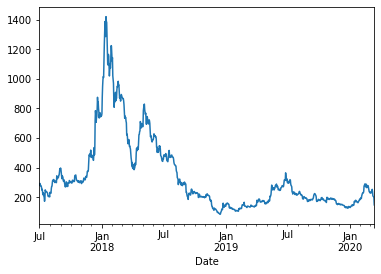

In [84]:
%matplotlib inline
highs.plot()

In [85]:
# Resample multiple columns at once
# Get the highest value for High, lowest value for Low, and sum for Volume
# agg is the same function for groupby
df.resample('W').agg({'Close': 'mean', 'High': 'max', 'Low': 'min', 'Volume': 'sum'}).head(10)

,Close,High,Low,Volume
Date,,,,
2017-07-02,268.202162,293.73,253.23,8.084631e+07
2017-07-09,261.062083,285.00,231.25,2.246746e+08
2017-07-16,195.698393,240.33,130.26,5.017750e+08
2017-07-23,212.783750,249.40,153.25,7.221637e+08
2017-07-30,203.309524,229.99,178.03,2.657305e+08
2017-08-06,225.313274,273.00,190.78,3.358722e+08
2017-08-13,294.084167,319.70,257.10,4.574880e+08
2017-08-20,295.947560,309.41,267.00,2.432700e+08
2017-08-27,324.307679,348.20,292.00,3.095004e+08


## Python Pandas Tutorial (Part 11): Reading/Writing Data to Different Sources - Excel, JSON, SQL, Etc

In [86]:
# Real world example
df = pd.read_csv('Python Data/developer_survey_2019/survey_results_public.csv',
                     index_col='Respondent')
schema_df = pd.read_csv('Python Data/developer_survey_2019/survey_results_schema.csv',
                     index_col='Column')

In [87]:
filt = (df['Country'] == 'India')
india_df = df.loc[filt]
india_df.head(5)

,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
Respondent,,,,,,,,,,,,,,,,,,,,,
8,I code primarily as a hobby,Yes,Less than once per year,"OSS is, on average, of HIGHER quality than pro...","Not employed, but looking for work",India,NaN,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...","Taught yourself a new language, framework, or ...",...,A lot more welcome now than last year,Tech articles written by other developers;Indu...,24.0,Man,No,Straight / Heterosexual,NaN,NaN,Appropriate in length,Neither easy nor difficult
10,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,India,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,NaN,...,Somewhat less welcome now than last year,Tech articles written by other developers;Tech...,NaN,NaN,NaN,NaN,NaN,Yes,Too long,Difficult
15,I am a student who is learning to code,Yes,Never,"OSS is, on average, of HIGHER quality than pro...","Not employed, but looking for work",India,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,20.0,Man,No,NaN,NaN,Yes,Too long,Neither easy nor difficult
50,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of LOWER quality than prop...",Employed full-time,India,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Another engineering discipline (ex. civil, ele...",Received on-the-job training in software devel...,...,Just as welcome now as I felt last year,Tech articles written by other developers;Tech...,23.0,Man,No,NaN,South Asian,No,Too long,Easy
65,I am a developer by profession,Yes,Never,NaN,Employed full-time,India,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Information systems, information technology, o...",NaN,...,A lot more welcome now than last year,NaN,21.0,Man,No,NaN,NaN,Yes,Appropriate in length,Neither easy nor difficult


In [88]:
# Write to CSV
india_df.to_csv('Python Data/modified.csv')

In [89]:
# Write to TSV
india_df.to_csv('Python Data/modified.tsv', sep='\t')

In [90]:
# Write to Excel
# 3 packages are needed
# pip install xlwt openpyxl xlrd
india_df.to_excel('Python Data/modified.xlsx')

In [91]:
# Read an Excel
test = pd.read_excel('Python Data/modified.xlsx', index_col='Respondent')
test.head(5)

,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
Respondent,,,,,,,,,,,,,,,,,,,,,
8,I code primarily as a hobby,Yes,Less than once per year,"OSS is, on average, of HIGHER quality than pro...","Not employed, but looking for work",India,NaN,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...","Taught yourself a new language, framework, or ...",...,A lot more welcome now than last year,Tech articles written by other developers;Indu...,24.0,Man,No,Straight / Heterosexual,NaN,NaN,Appropriate in length,Neither easy nor difficult
10,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,India,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,NaN,...,Somewhat less welcome now than last year,Tech articles written by other developers;Tech...,NaN,NaN,NaN,NaN,NaN,Yes,Too long,Difficult
15,I am a student who is learning to code,Yes,Never,"OSS is, on average, of HIGHER quality than pro...","Not employed, but looking for work",India,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,20.0,Man,No,NaN,NaN,Yes,Too long,Neither easy nor difficult
50,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of LOWER quality than prop...",Employed full-time,India,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Another engineering discipline (ex. civil, ele...",Received on-the-job training in software devel...,...,Just as welcome now as I felt last year,Tech articles written by other developers;Tech...,23.0,Man,No,NaN,South Asian,No,Too long,Easy
65,I am a developer by profession,Yes,Never,NaN,Employed full-time,India,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Information systems, information technology, o...",NaN,...,A lot more welcome now than last year,NaN,21.0,Man,No,NaN,NaN,Yes,Appropriate in length,Neither easy nor difficult


In [92]:
import os


os.remove('Python Data/modified.csv')
os.remove('Python Data/modified.tsv')
os.remove('Python Data/modified.xlsx')

### Suggested: Python Quick Tip: Hiding Passwords and Secret Keys in Environment Variables (Windows)

Add username and password into Environment Variables, so, username and passord won't appear in Python script.<br>
In another word, only people who add username and password into Environment Variables can access the file.<br>

Windows:<br>
Control Panel => System and Security => System => Advanced system settings => Evvironment Variables<br>
Add new user variables<br>
For example: "DB_USER: my_db_user" && "DB_PASS: my_db_pass_123!"

In [ ]:
import os


db_user = os.environ.get('DB_USER')
db_password = os.environ.get('DB_PASS')

print(db_user)
print(db_password)

### End: Python Quick Tip: Hiding Passwords and Secret Keys in Environment Variables (Windows)